In [1]:
import re
import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import torch
import random

In [2]:
!# Clone the YOLOv5 repository to use for object detection

git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x6')

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-9 Python-3.11.3 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


In [5]:
print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1

In [ ]:
for i in range(len(lines)):
    with open('./data/labels/{}.txt'.format(names[i]), 'a') as f:
        for j in range(len(normalcordinates[i])) :
            x1,y1,x2,y2 = normalcordinates[i][j]
            f.write('1 {} {} {} {}\n'.format((x1+x2)/2,(y1+y2)/2,x2-x1,y2-y1))

In [ ]:
!cd yolov5 && python train.py --img 224 --batch 10 --epochs 100 --data dataset.yaml --weights yolov5x6.pt

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2024-2-9 Python-3.11.3 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 416 layers, 139980484 parameters, 0 gradients, 207.9 GFLOPs
Adding AutoShape... 


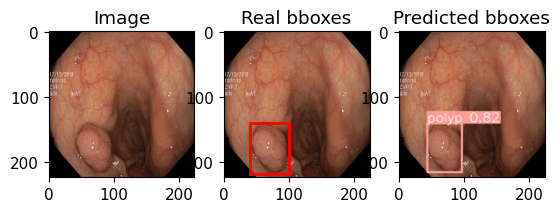

In [8]:
%matplotlib inline
for i in range(1):
    filename = random.choice(os.listdir("./data/images"))


    img = np.asarray(Image.open("./data/images/" + filename))
    results = model(img)

    import ast
    df = pd.read_csv("./df.csv")
    shape=(224,224)

    fig, ax1 = plt.subplots(1,3)

    # Plot image
    ax1[0].set_title('Image')
    ax1[0].imshow(img.astype(np.uint8))  

    # Plot real bboxes
    ax1[1].imshow(img)
    ax1[1].set_title('Real bboxes')
    bboxes = ast.literal_eval(df.loc[df['image'] == filename.split('.')[0], 'nbboxes'].squeeze())
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        width = (x2 - x1) * shape[0]
        height = (y2 - y1) * shape[1]
        rect = patches.Rectangle((x1*shape[0],y1*shape[1]), width, height,  
                                        linewidth=2, edgecolor='r', facecolor='none')
        ax1[1].add_patch(rect)

    #Plot pred bboxes
    ax1[2].imshow(np.squeeze(results.render()))
    ax1[2].set_title('Predicted bboxes')

    plt.savefig(str(i)+".jpg",bbox_inches='tight')